# Week 6 Quiz

## Zichen Zhao (Jackson) - [zz3119]

### Due Mon Nov 11th, 11:59pm ET

In this quiz we'll be loading some data, training a few models and plotting their decision boundaries to visually compare how the models perform.

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore') # sklearn complains about predicting on data 
                                  # without column-names when trained on a dataframe
sns.set_style('darkgrid')
%matplotlib inline

In [10]:
# For this quiz we'll be using a sample of vehicle data taken from:
#   https://www.fueleconomy.gov/feg/ws/

# We'll be classifying Front-Wheel vs 4-Wheel Drive vehicles 
#   by City and Highway miles per gallon (MPG)

# Column Definitions:
#  UCity - city MPG
#  UHighway - highway MPG
#  target - 0:"Front-Wheel Drive", 1:"4-Wheel or All-Wheel Drive"

df = pd.read_csv('../data/vehicle_subset_quiz6.csv')
df.head()

,UCity,UHighway,target
0,31.0000,50.5000,0
1,22.7000,38.7000,0
2,21.2358,33.2499,0
3,25.4478,38.5370,0
4,20.3000,32.1000,0


In [11]:
# The two features we want to classify on are "UCity" and "UHighway"
# Store these two feature columns from df in X
X = df[["UCity", "UHighway"]]

# Check to make sure that X only has 100 rows and 2 columns
assert X.shape == (100,2)

# Store the target column "target" in y
y = df["target"]

# Check to make sure that y is 1 dimensional with 100 elements
assert y.shape == (100,)

# Print out the number of observations per target
# Note that each class should have 50 observations.
print(y.value_counts())

target
0    50
1    50
Name: count, dtype: int64


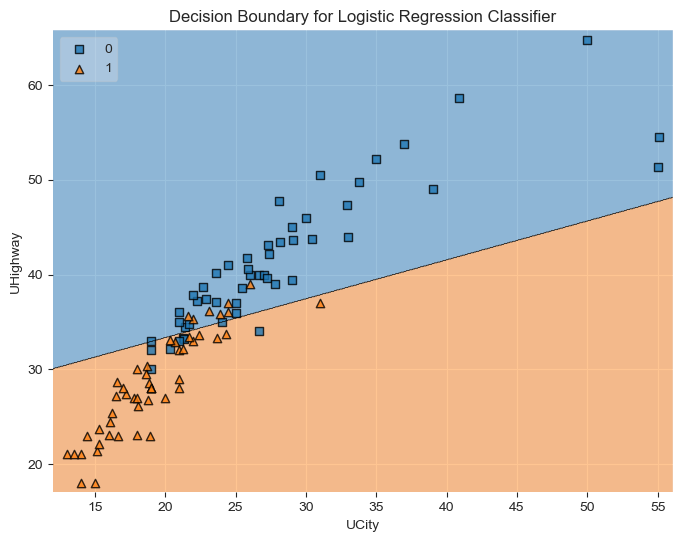

In [12]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model with default settings
# Store the untrained model in logr
logr = LogisticRegression()

# Fit the model on on X and y
logr.fit(X, y)

# Plot the training set and trained classifier with 
#   plot_decision_regions() 
# NOTE: plot_decision_regions() requires numpy arrays, not pandas objects
#   use X.values, y.values to pass in numpy arrays

plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=logr, legend=2)
plt.xlabel("UCity")
plt.ylabel("UHighway")
plt.title("Decision Boundary for Logistic Regression Classifier")
plt.show()

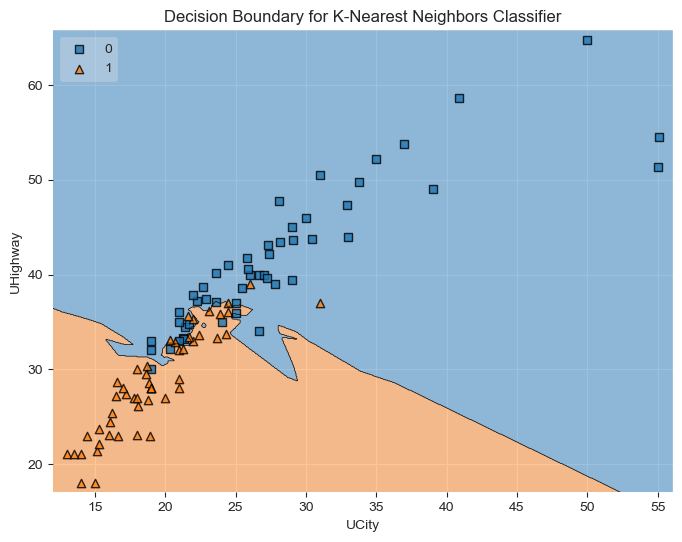

In [13]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with default settings
#   and fit on X and y
# Store the trained model in knn
knn = KNeighborsClassifier().fit(X, y)

# Plot the training set and trained classifier with plot_decision_regions()
plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=knn, legend=2)
plt.xlabel("UCity")
plt.ylabel("UHighway")
plt.title("Decision Boundary for K-Nearest Neighbors Classifier")
plt.show()

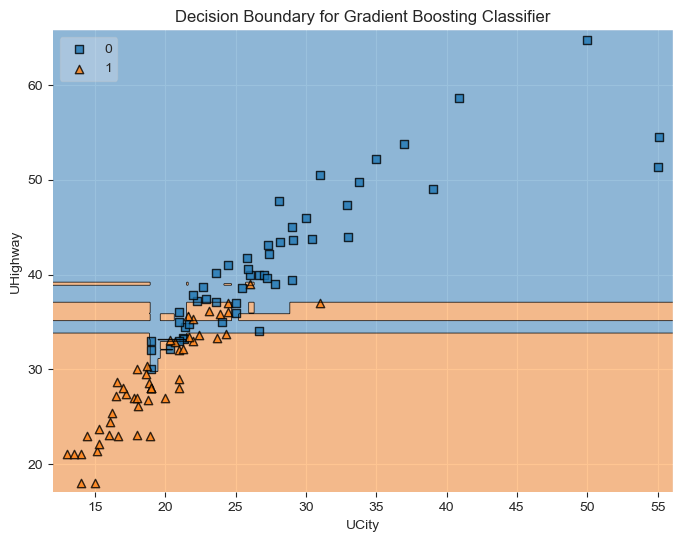

In [14]:
# Import GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier with default settings
#   and fit on X and y
# Store the trained model in gbc
gbc = GradientBoostingClassifier().fit(X, y)

# Plot the training set and trained classifier with plot_decision_regions()
plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=gbc, legend=2)
plt.xlabel("UCity")
plt.ylabel("UHighway")
plt.title("Decision Boundary for Gradient Boosting Classifier")
plt.show()